<img src="./images/r+jupyter.png" alt="图片说明" style="height:300px">

## 安装anaconda和R

1. anaconda下载地址：https://mirrors.tuna.tsinghua.edu.cn/anaconda/archive/
2. R下载地址：https://www.r-project.org/

## 安装在jupyter中运行R程序需要的R包

在R中运行如下代码，来安装依赖的R包

In [ ]:
install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))
devtools::install_github('IRkernel/IRkernel')

在R中运行如下代码，使得R在jupyter中可以被探测到。

- 仅对当前用户有效

In [ ]:
IRkernel::installspec()

- 对此电脑上所有用户有效,推荐使用这个选项

In [ ]:
IRkernel::installspec(user = FALSE)

## 开始在jupyter中使用R

### 修改软件包下载地址，避免下载失败或者下载速度过慢,国内镜像地址：

> http://mirrors.tuna.tsinghua.edu.cn/CRAN/	TUNA Team, Tsinghua University

> http://mirrors.ustc.edu.cn/CRAN/	University of Science and Technology of China

> https://mirrors.eliteu.cn/CRAN/	Elite Education(广州)

> https://mirror.lzu.edu.cn/CRAN/	Lanzhou University Open Source Society

> https://mirrors.tongji.edu.cn/CRAN/	Tongji University

In [3]:
# 通过如下命令设定镜像
options(repos = 'http://mirrors.ustc.edu.cn/CRAN/')

In [4]:
# 查看镜像是否修改
getOption('repos')

[1] "http://mirrors.ustc.edu.cn/CRAN/"

In [5]:
# 尝试下载R包
install.packages('ggplot2')

Installing package into 'C:/Users/songshu/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\songshu\AppData\Local\Temp\RtmpQ5lHFD\downloaded_packages


### 运行R代码

In [6]:
# 查看R内置数据集的前6行
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


### 输出可视化图形

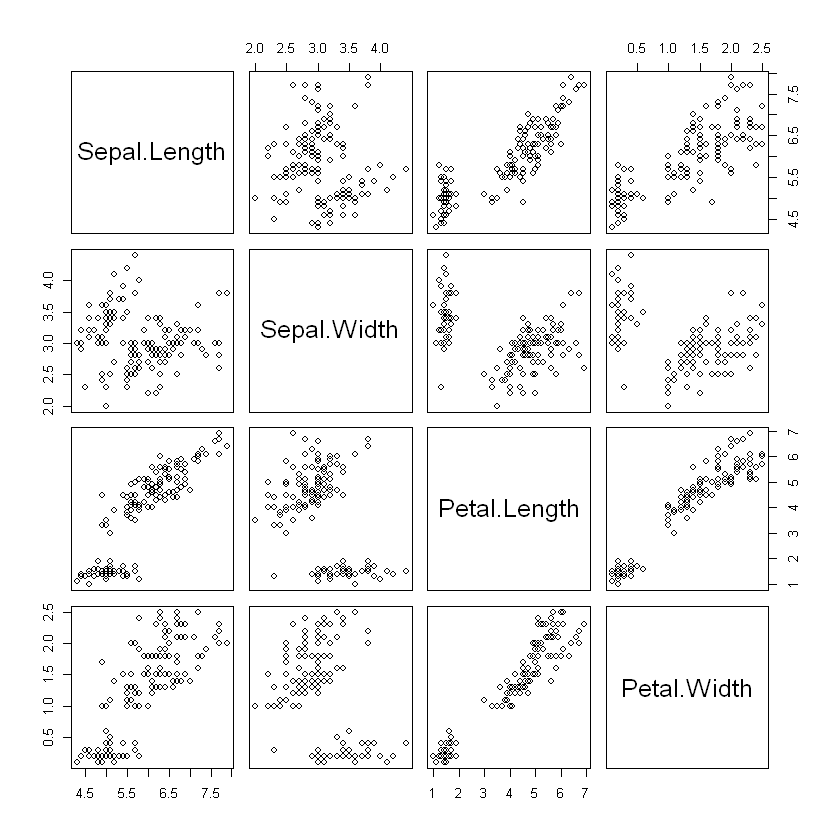

In [7]:
pairs(iris[1:4])

### 使用帮助文档系统

In [8]:
# 使用help函数
help(iris)


pairs> pairs(iris[1:4], main = "Anderson's Iris Data -- 3 species",
pairs+       pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])

pairs> ## formula method
pairs> pairs(~ Fertility + Education + Catholic, data = swiss,
pairs+       subset = Education < 20, main = "Swiss data, Education < 20")


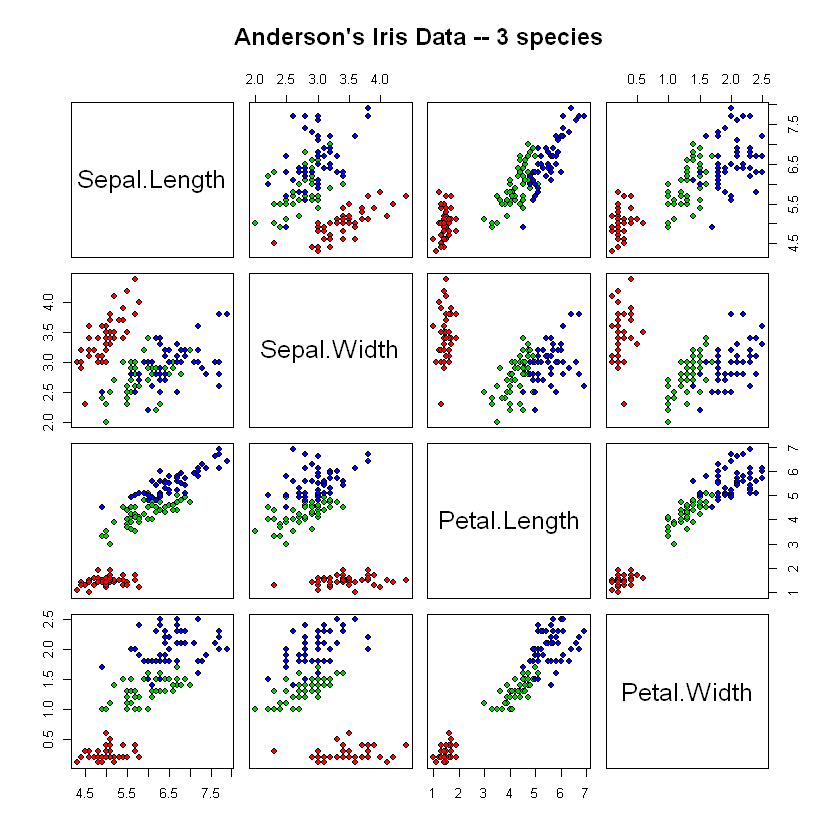


pairs> pairs(USJudgeRatings)


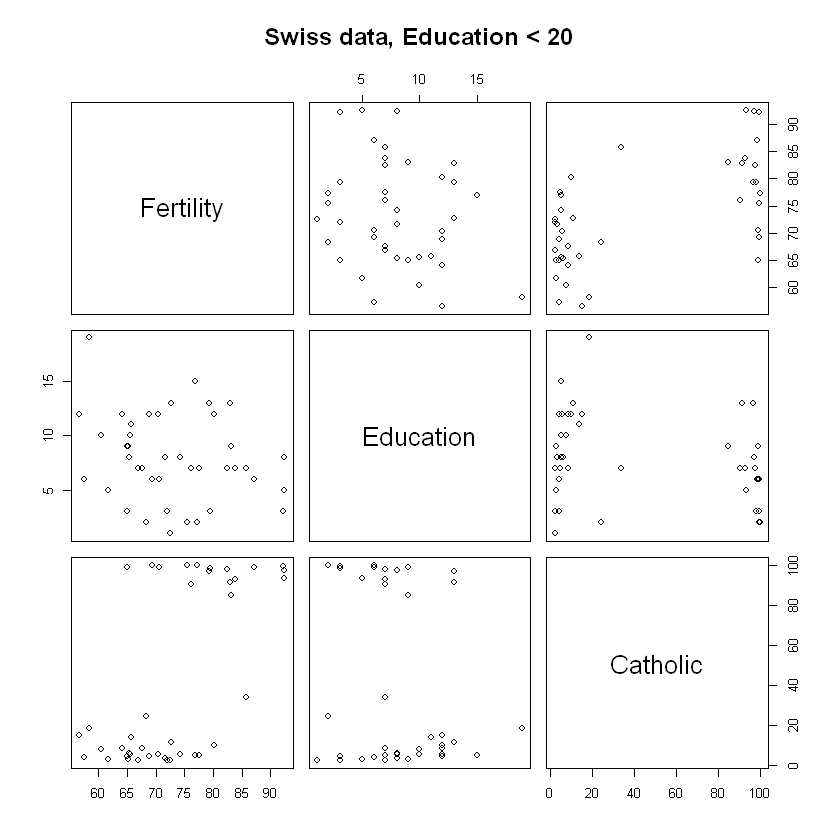


pairs> ## show only lower triangle (and suppress labeling for whatever reason):
pairs> pairs(USJudgeRatings, text.panel = NULL, upper.panel = NULL)


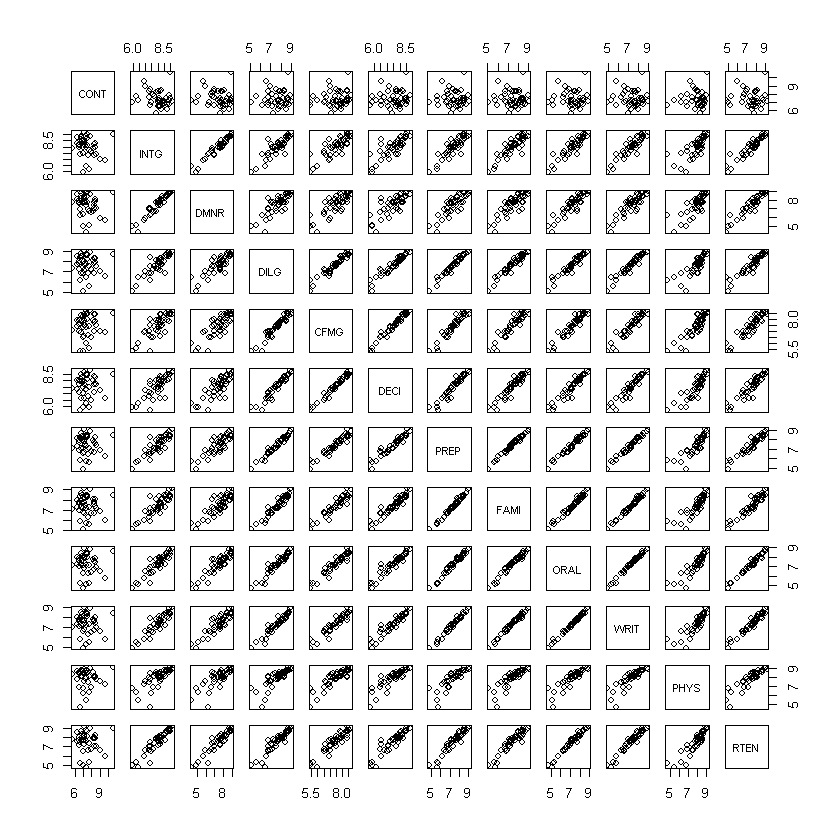


pairs> ## put histograms on the diagonal
pairs> panel.hist <- function(x, ...)
pairs+ {
pairs+     usr <- par("usr"); on.exit(par(usr))
pairs+     par(usr = c(usr[1:2], 0, 1.5) )
pairs+     h <- hist(x, plot = FALSE)
pairs+     breaks <- h$breaks; nB <- length(breaks)
pairs+     y <- h$counts; y <- y/max(y)
pairs+     rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
pairs+ }

pairs> pairs(USJudgeRatings[1:5], panel = panel.smooth,
pairs+       cex = 1.5, pch = 24, bg = "light blue",
pairs+       diag.panel = panel.hist, cex.labels = 2, font.labels = 2)


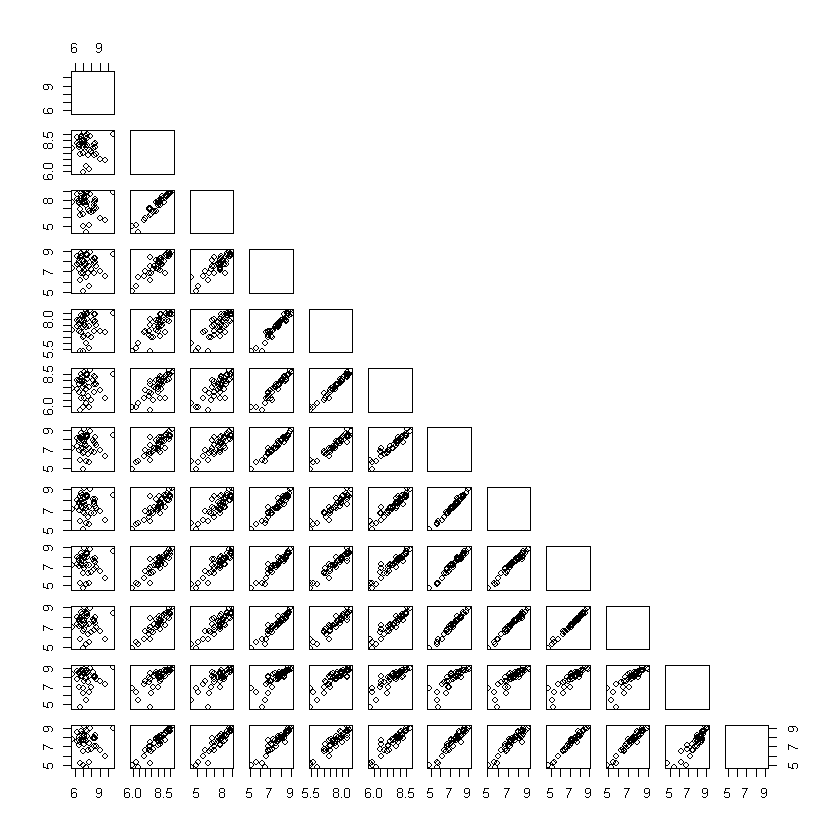


pairs> ## put (absolute) correlations on the upper panels,
pairs> ## with size proportional to the correlations.
pairs> panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
pairs+ {
pairs+     usr <- par("usr"); on.exit(par(usr))
pairs+     par(usr = c(0, 1, 0, 1))
pairs+     r <- abs(cor(x, y))
pairs+     txt <- format(c(r, 0.123456789), digits = digits)[1]
pairs+     txt <- paste0(prefix, txt)
pairs+     if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
pairs+     text(0.5, 0.5, txt, cex = cex.cor * r)
pairs+ }

pairs> pairs(USJudgeRatings, lower.panel = panel.smooth, upper.panel = panel.cor)


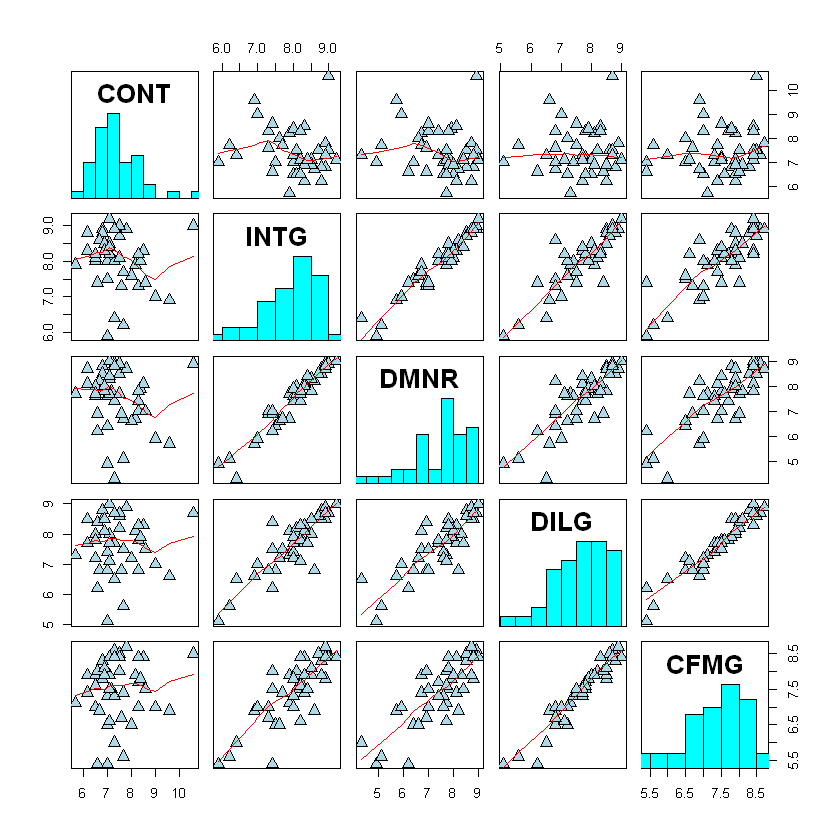


pairs> pairs(iris[-5], log = "xy") # plot all variables on log scale


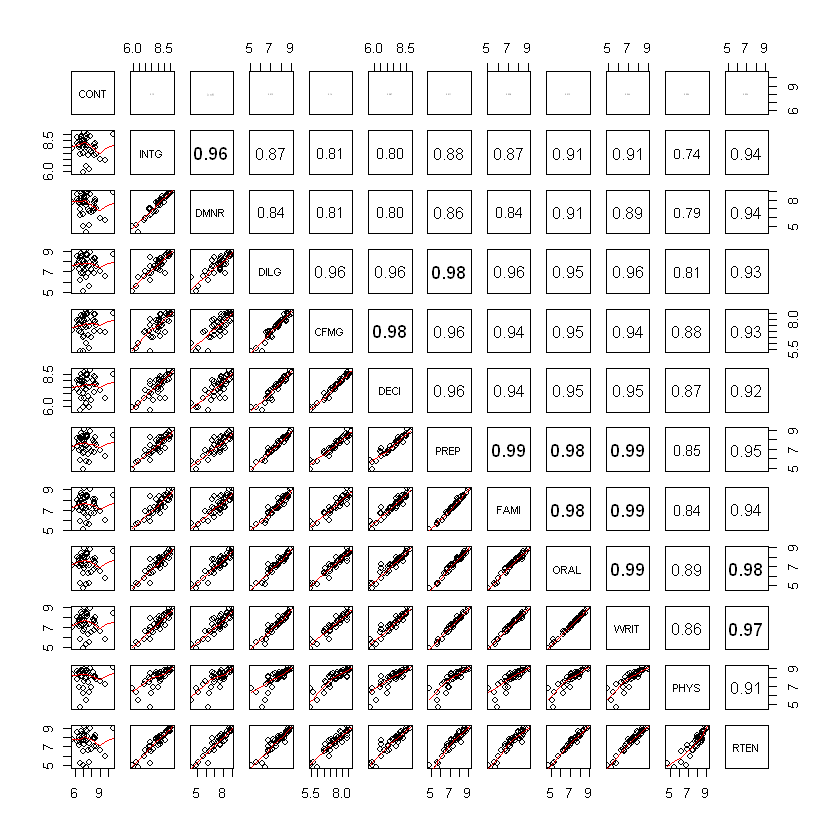


pairs> pairs(iris, log = 1:4, # log the first four
pairs+       main = "Lengths and Widths in [log]", line.main=1.5, oma=c(2,2,3,2))


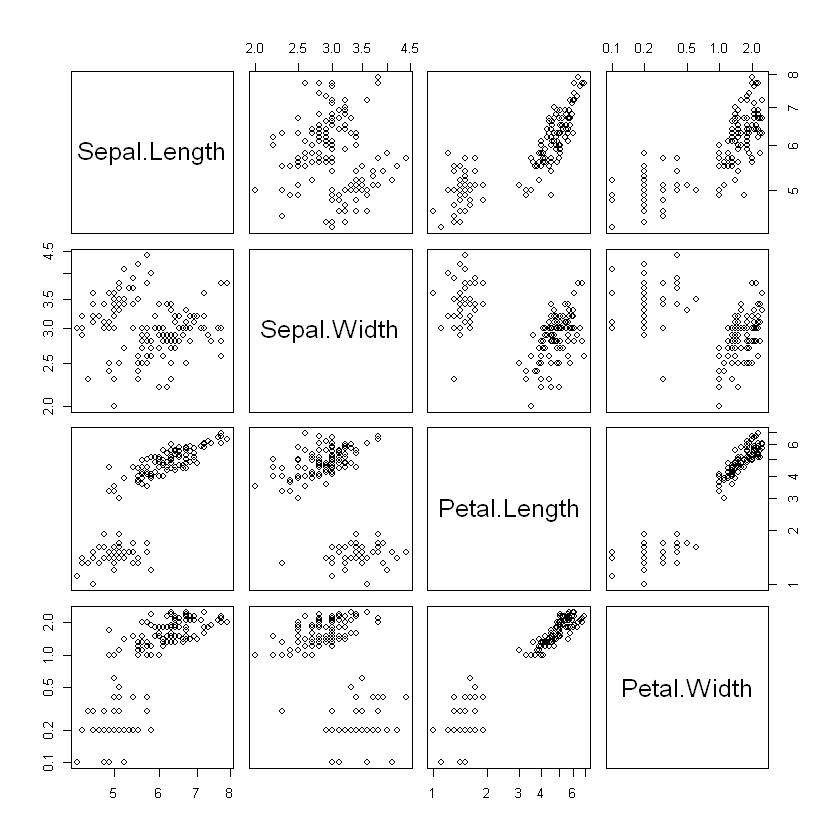

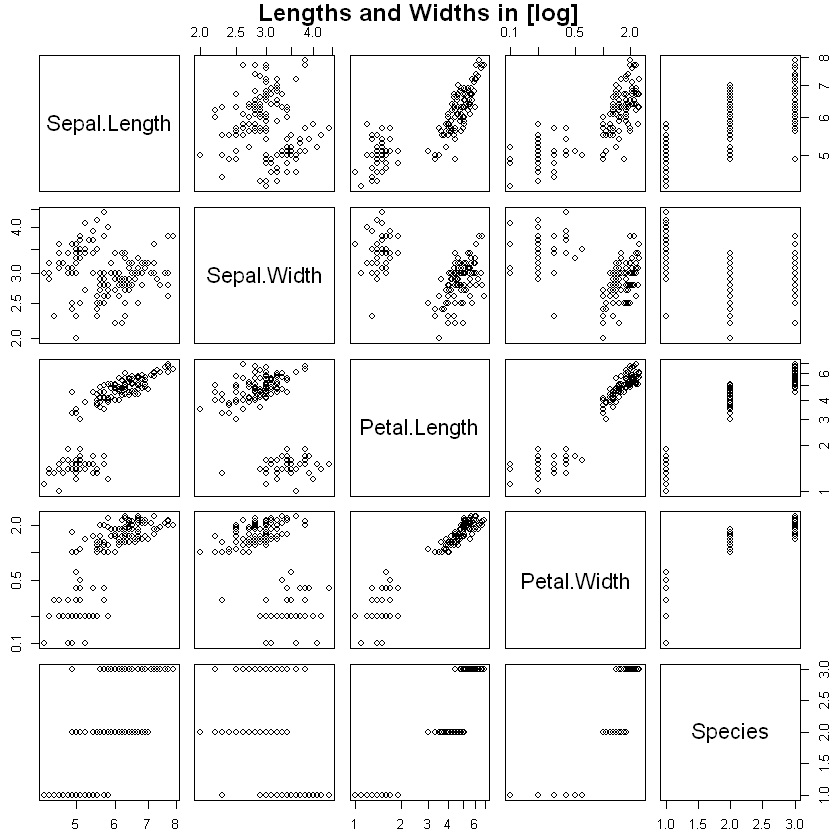

In [9]:
# 使用example函数
example(pairs)

### 检查能否在jupyter中使用sparklyr

In [11]:
# 创建spark服务
library(sparklyr)
library(dplyr)
sc <- spark_connect(master = "local")

Re-using existing Spark connection to local


In [12]:
# 尝试载入数据
credit_card <-spark_read_csv(sc,'credit_card','g:/Data/kaggle/credit_card_copys.csv',header = TRUE)

In [13]:
# 表格记录数
count(credit_card)

# Source:   lazy query [?? x 1]
# Database: spark_connection
         n
     <dbl>
1 26910720

In [14]:
# 使用dplyr包操作数据
year_count<- credit_card %>% 
    group_by(card) %>% 
    summarise(counts = n(),mean_spent = mean(spent))%>% 
    collect()

In [15]:
# card类型
year_count

card,counts,mean_spent
Mastercard,8724480,200.0840
Discover,4177920,131.0649
Other,1843200,128.5300
American Express,5775360,236.4361
Visa,6389760,216.8587


In [16]:
# 使用SQL语句操作数据
library(DBI)
dbGetQuery(sc,'select card,count(custid) counts,avg(spent) mean_spent from credit_card limit group by card')

card,counts,mean_spent
Mastercard,8724480,200.0840
Discover,4177920,131.0649
Other,1843200,128.5300
American Express,5775360,236.4361
Visa,6389760,216.8587
